# Volumetric rendering

In this exercise you will use some basic methods of visualizing medical volumes. A CT volume will be loaded for you into numpy array - do not worry too much about file format, what the pixel values are, and the libraries used to load the image - we will get to it in the lessons that follow.

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as nd

In [2]:
img = nib.load("data/volume.nii.gz")

In [3]:
img_np = img.get_fdata()
img_np.shape

(360, 360, 330)

At this point img_np is a numpy 3D array that contains our medical volume, its size is 360 x 360 x 330. 

The first dimension is the X axis, and if we slice the array across it, we will get slices in sagittal plane. The second dimension is the Y axis, and slicing across it will get us the coronal plane. Third dimension is the Z axis and if we slice across it we will get the axial plane. This is a common way of assigning axes to a medical image. Again, in later lessons we will talk in more detail about patient coordinate systems and axes.

Let's visualize a sagittal slice number 100. Remember the _Multi-planar reconstruction_ task we've talked about in the lectures? This is exactly what we are going to do here - for our CT volume, the axial plane is the primary one, and we are reconsructing a cut across a plane orthogonal to the primary one.

Note that we specify the grayscale colormap for matplotlib as this is the method of choice for visualizing medical images.

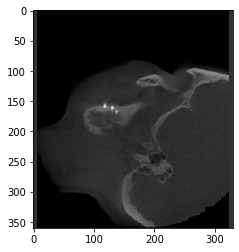

In [10]:
plt.imshow(img_np[100,:,:], cmap="gray")

Not very clear, eh? Your task in this exercise would be to add up all the slices by going down the X axis and visualize the output - it should become clearer what you are dealing with. This is one method of volume rendering, called orthographic projection. 

## Orthographic projection

In [12]:
vr = np.zeros((img_np.shape[1], img_np.shape[2]))

# TASK: write a loop that will sum up the intensities on all the slices, store the result 
# in the variable vr and visualize it



In [1]:
## <YOUR CODE>

---

Can you guess what you are looking at? Does it look like an X-ray image to you? Can you guess why?

This method of volume rendering is rather basic because while it does present all the information from a volume in a single image, it does not really make use of all the colors available to the display, it does not make distinction between tissue types (although the nature of HUs accounts for that somewhat), it does not apply any external lighting or reflections as many 3D rendering engines do. In some cases it would also help to account for perspective to make a more natural-looking image (while sacrificing the preservation of relative distances).

All these things would be improvements, and they would all fall into the category of _transfer function_ design where you would come up with a way to compute the color of the on-screen pixel as you march along the ray cast from your virtual camera into the 3D volume space.

## Maximum Intensity Projection

Another popular method of rendering 3D volumes is called "Maximum Intensity Projection". This method makes sure that maximum values (in case of CT corresponding to the densest structures) are propagated and prominently visualized. A MIP projection can help a physician visualize foreign materials, bones or structures filled with a contrast medium.

You will create a MIP projection in this task.

In [185]:
# For a change, let's stack slices along the Y axis and thus visualize the coronal plane
mip = np.zeros((img_np.shape[0], img_np.shape[2]))

# TASK: write same loop you wrote above (but going through the Y-axis), but now rather than adding all values, use 
# np.maximum function to save the maximum value of each pixel across our entire slice stack

In [2]:
## <YOUR CODE>

---

Looks impressive, doesn't it? You can clearly see now that this is a scan of the head, and MIP projection makes the implants stand out. You can clearly see a molar implant there, along with some other dental hardware. We will examine this image closer in the lessons that follow